# Hospital Financial Data Analysis: An Exploration into California's Healthcare Finances

## Importing Necessary Libraries and Data

In [13]:
import pandas as pd

# Load the cleaned_dataset.csv file
data = pd.read_csv('cleaned_dataset.csv')


## Initial Data Inspection

In [14]:
data.head()

,FAC_NO,FAC_NAME,BEG_DATE,END_DATE,DAY_PER,DATA_IND,AUDIT_IND,COUNTY,HSA,HFPA,...,PD_HR_DLY,PD_HR_AMB,PD_HR_ANC,PD_HR_ED,PD_HR_GEN,PD_HR_FIS,PD_HR_ADM,YEAR,Year,Income_by_year
0,106150788,ADVENTIST HEALTH BAKERSFIELD,2021-01-01,2021-12-31,365,Audited,Incl. Ind. Audit Adj.,Kern,9,617,...,961859.0,480782.0,834805.0,1664.0,196079.0,5566.0,187074.0,2021,2021,2.797901e+09
1,106171049,ADVENTIST HEALTH CLEARLAKE,2021-01-01,2021-12-31,365,Audited,Incl. Ind. Audit Adj.,Lake,1,115,...,105165.0,694222.0,218209.0,NaN,79039.0,NaN,105005.0,2021,2021,2.797901e+09
2,106150706,ADVENTIST HEALTH DELANO,2021-01-01,2021-12-31,365,Audited,Incl. Ind. Audit Adj.,Kern,9,617,...,305898.0,138057.0,240843.0,NaN,86216.0,48319.0,70925.0,2021,2021,2.797901e+09
3,106190323,ADVENTIST HEALTH GLENDALE,2021-01-01,2021-12-31,365,Audited,Excl. Ind. Audit Adj.,Los Angeles,11,909,...,1525982.0,339475.0,944281.0,80580.0,350605.0,28726.0,383895.0,2021,2021,2.797901e+09
4,106164029,ADVENTIST HEALTH HANFORD,2021-01-01,2021-12-31,365,Audited,Incl. Ind. Audit Adj.,Kings,9,615,...,690397.0,237275.0,738656.0,3932.0,222055.0,10870.0,228925.0,2021,2021,2.797901e+09


## Data Exploration: Evaluate Data

In [15]:
# Understanding the Dataset

# Display the shape of the dataset (number of rows and columns)
shape = data.shape

# Display the column names and their data types
data_types = data.dtypes

# Display a brief summary of the dataset
summary = data.describe(include='all')

shape, summary.head()

((220, 242),
               FAC_NO                      FAC_NAME    BEG_DATE    END_DATE  \
 count   2.200000e+02                           220         220         220   
 unique           NaN                           220          10           7   
 top              NaN  ADVENTIST HEALTH BAKERSFIELD  2021-01-01  2021-12-31   
 freq             NaN                             1         176         179   
 mean    1.062881e+08                           NaN         NaN         NaN   
 
            DAY_PER DATA_IND              AUDIT_IND       COUNTY         HSA  \
 count   220.000000      220                    220          220  220.000000   
 unique         NaN        1                      2           44         NaN   
 top            NaN  Audited  Incl. Ind. Audit Adj.  Los Angeles         NaN   
 freq           NaN      220                    139           55         NaN   
 mean    361.327273      NaN                    NaN          NaN    8.590909   
 
               HFPA  ...     

## Descriptive Statistics

In [16]:
selected_variables = ['Income_by_year', 'PRD_HR_DLY', 'NURS_FTE', 'DIS_TOT', 'CUR_ASST']
# Description of the 5 Variables
description = data[selected_variables].describe()

# Descriptive Statistics
mean = data[selected_variables].mean()
mode = data[selected_variables].mode().iloc[0]
spread = data[selected_variables].std()
skewness = data[selected_variables].skew()
kurtosis = data[selected_variables].kurtosis()

# Display the statistics
description, mean, mode, spread, skewness, kurtosis

(       Income_by_year    PRD_HR_DLY    NURS_FTE       DIS_TOT      CUR_ASST
 count    2.200000e+02  2.100000e+02   210.00000    220.000000  2.140000e+02
 mean     2.857530e+09  5.339032e+05   335.42381   6391.272727  1.533921e+08
 std      1.475683e+08  5.816003e+05   406.68776   7311.045401  3.191190e+08
 min      2.797901e+09  1.497400e+04     6.00000      6.000000  2.974030e+05
 25%      2.797901e+09  1.552195e+05    90.00000    860.250000  1.294792e+07
 50%      2.797901e+09  3.079600e+05   177.00000   3494.000000  4.683966e+07
 75%      2.797901e+09  7.246408e+05   457.50000   9353.500000  1.635161e+08
 max      3.221071e+09  3.377095e+06  2766.00000  38807.000000  3.153519e+09,
 Income_by_year    2.857530e+09
 PRD_HR_DLY        5.339032e+05
 NURS_FTE          3.354238e+02
 DIS_TOT           6.391273e+03
 CUR_ASST          1.533921e+08
 dtype: float64,
 Income_by_year    2.797901e+09
 PRD_HR_DLY        2.005740e+05
 NURS_FTE          6.000000e+00
 DIS_TOT           2.660000e+02
 

## Variables for Analysis:

1. Income_by_year: Represents the net income of the hospital.
1. COUNTY: The county in which the hospital is located.
1. PRD_HR_DLY: Total operational hours of the hospital.
1. NURS_FTE: Number of full-time equivalent nurses.
1. DIS_TOT: Total number of patients discharged.
1. CUR_ASST: Current assets of the hospital.



## Data Visualization: Histograms

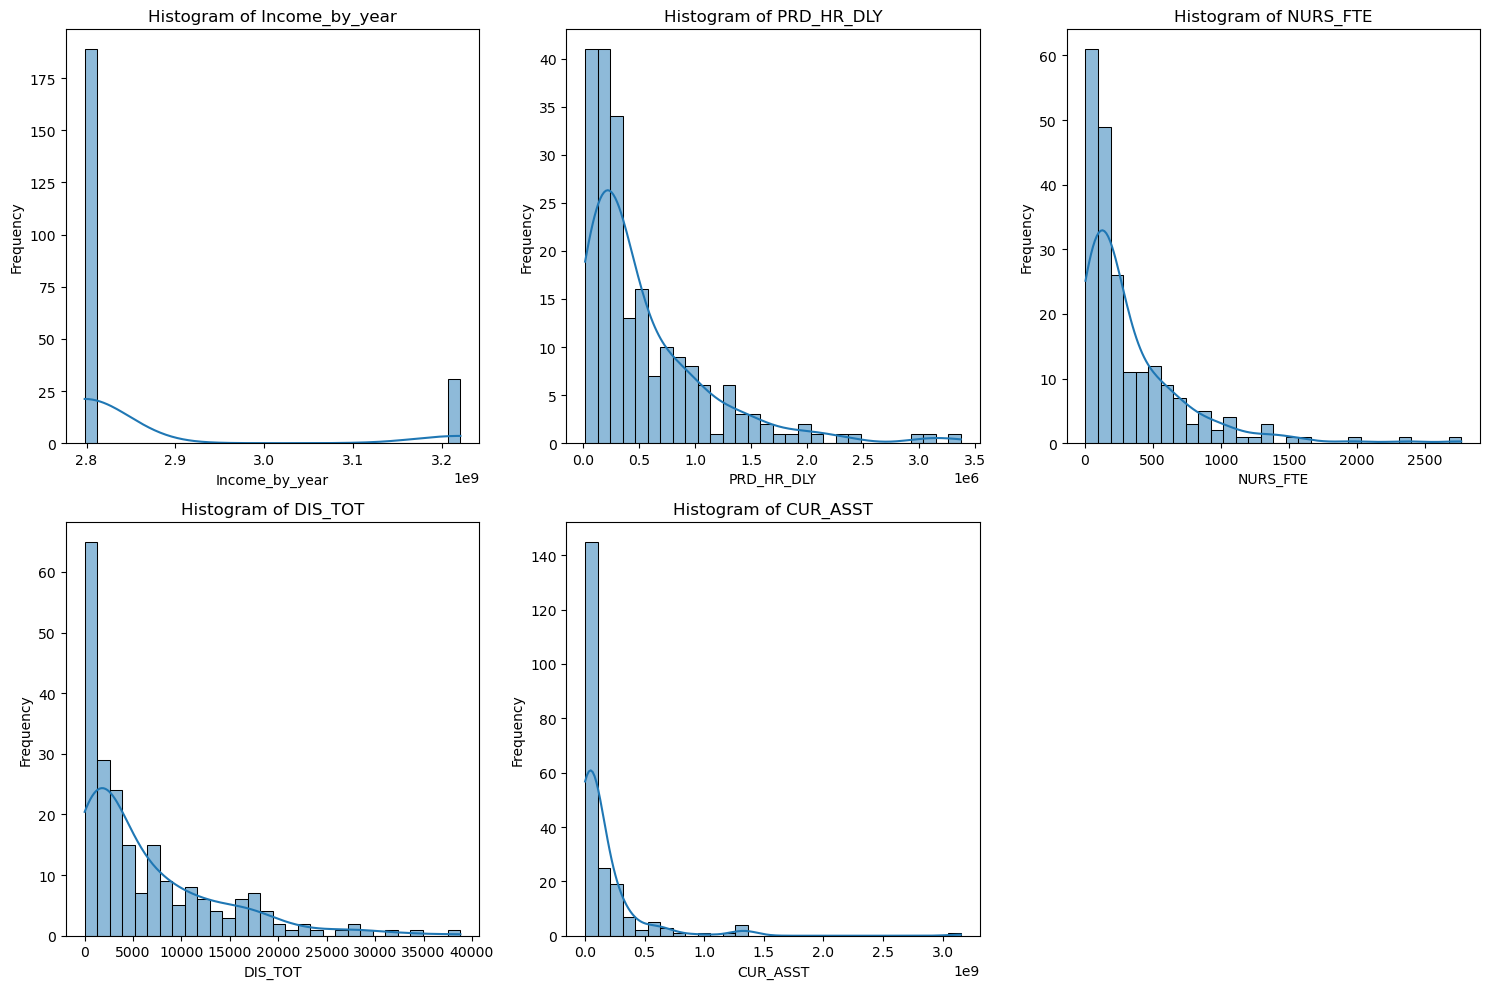

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variables selected for analysis
selected_variables = ['Income_by_year', 'PRD_HR_DLY', 'NURS_FTE', 'DIS_TOT', 'CUR_ASST']

# Histograms for the 5 Variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Cumulative Distribution Function (CDF) Analysis

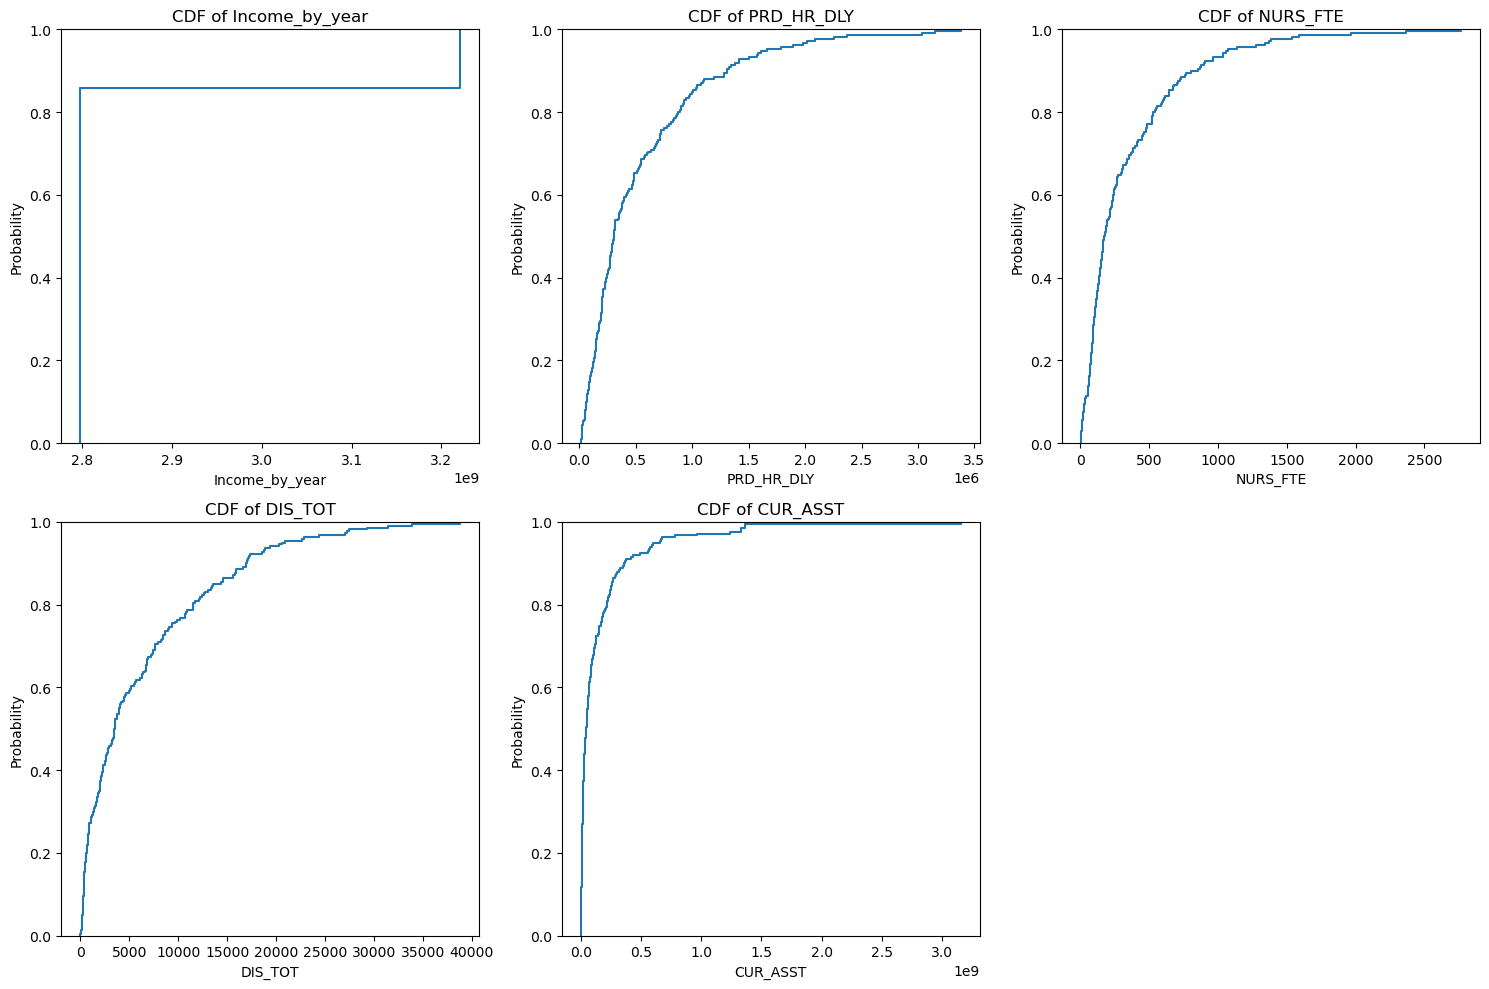

In [18]:
# Cumulative Distribution Function (CDF) analysis

plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables, 1):
    plt.subplot(2, 3, i)
    sns.ecdfplot(data[var])
    plt.title(f'CDF of {var}')
    plt.xlabel(var)
    plt.ylabel('Probability')
plt.tight_layout()
plt.show()

## Check for and remove non-finite values in the selected variables

In [19]:
from scipy.stats import norm

In [20]:
# Check for non-finite values in the selected variables
non_finite_values = data[selected_variables].apply(lambda x: x.isnull().sum() + np.isinf(x).sum())
non_finite_values

Income_by_year     0
PRD_HR_DLY        10
NURS_FTE          10
DIS_TOT            0
CUR_ASST           6
dtype: int64

In [21]:
# Remove rows with non-finite values for the selected variables
cleaned_data = data.dropna(subset=selected_variables)

## Analytical Distribution Plots

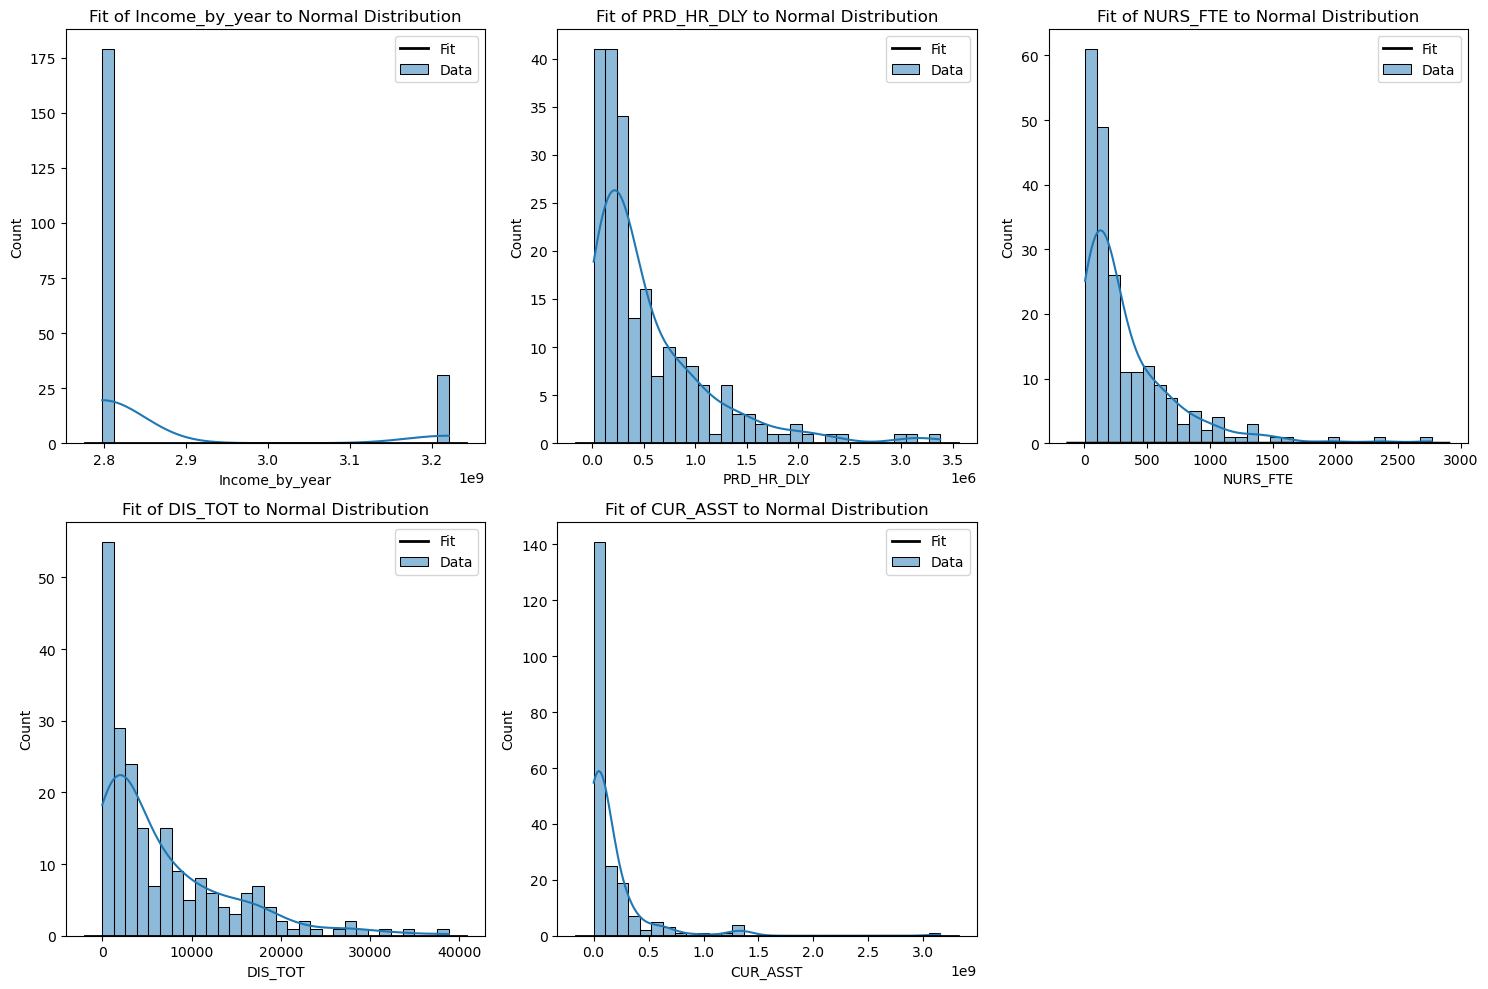

In [22]:
# Analytical Distribution Plot
plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_data[var], kde=True, bins=30, label='Data')
    # Fit the data to a normal distribution
    mu, std = norm.fit(cleaned_data[var])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Fit')
    plt.title(f'Fit of {var} to Normal Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

## Scatter plots with correlation and causation analysis

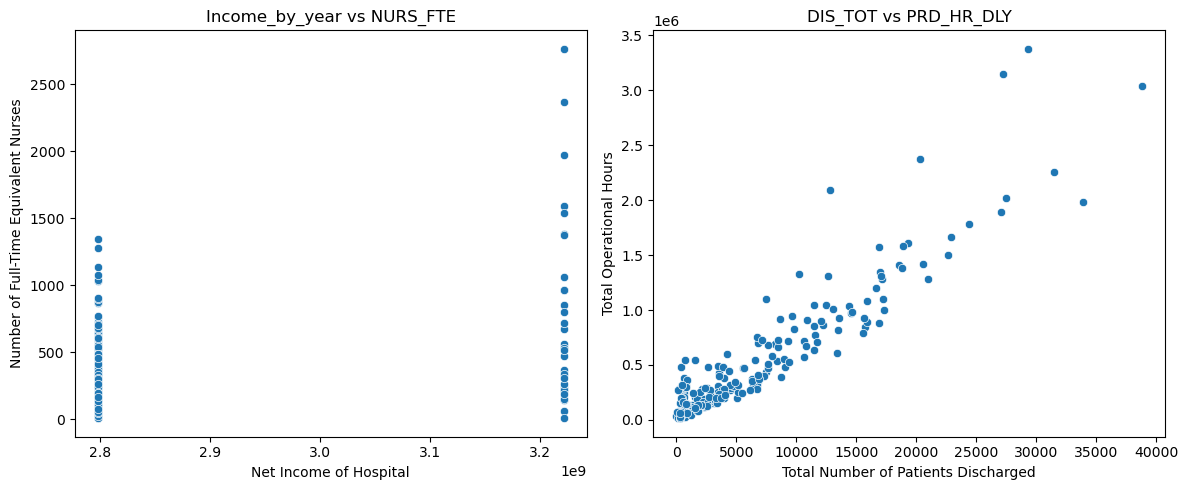

In [23]:
# Scatter plots with correlation and causation analysis

plt.figure(figsize=(12, 5))

# Scatter plot for Income_by_year vs NURS_FTE
plt.subplot(1, 2, 1)
sns.scatterplot(x='Income_by_year', y='NURS_FTE', data=cleaned_data)
plt.title('Income_by_year vs NURS_FTE')
plt.xlabel('Net Income of Hospital')
plt.ylabel('Number of Full-Time Equivalent Nurses')

# Scatter plot for DIS_TOT vs PRD_HR_DLY
plt.subplot(1, 2, 2)
sns.scatterplot(x='DIS_TOT', y='PRD_HR_DLY', data=cleaned_data)
plt.title('DIS_TOT vs PRD_HR_DLY')
plt.xlabel('Total Number of Patients Discharged')
plt.ylabel('Total Operational Hours')

plt.tight_layout()
plt.show()

## Compute correlation coefficients

In [24]:
# Compute correlation coefficients
correlation_income_nurs = cleaned_data['Income_by_year'].corr(cleaned_data['NURS_FTE'])
correlation_dis_prd = cleaned_data['DIS_TOT'].corr(data['PRD_HR_DLY'])

correlation_income_nurs, correlation_dis_prd

(0.4537616744614697, 0.9266736901366855)

## Statistical Question:

## "Does a higher number of full-time equivalent nurses (NURS_FTE) lead to an increase in the total number of patients discharged (DIS_TOT), indicating better operational efficiency in hospitals?"

## Hypothesis 1: Relationship between Hospital Income and Number of Nurses

In [25]:
import statsmodels.api as sm

# Hypothesis 1: Regression analysis for Income_by_year vs NURS_FTE
X = cleaned_data['Income_by_year']
y = cleaned_data['NURS_FTE']
X = sm.add_constant(X)  # Adding a constant (intercept) to the model

# Fit the regression model
model = sm.OLS(y, X).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NURS_FTE   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     53.93
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           4.62e-12
Time:                        12:09:27   Log-Likelihood:                -1535.0
No. Observations:                 210   AIC:                             3074.
Df Residuals:                     208   BIC:                             3081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3172.6734    478.351     -6.633      0.000   -4115.712   -2229.635
Income_by_year  1.226e-06   1.67e-07      7.344      0.000    8.97e-07    1.56e-06
==============================================================================
Omnibus:                       98.765   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.492
Skew:                           1.868   Prob(JB):                     3.31e-94
Kurtosis:                       8.937   Cond. No.                     5.47e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Hypothesis 2: Relationship between Operational Hours and Patients Discharged

In [26]:
# Hypothesis 2: Regression analysis for DIS_TOT vs PRD_HR_DLY
X2 = cleaned_data['DIS_TOT']
y2 = cleaned_data['PRD_HR_DLY']
X2 = sm.add_constant(X2)  # Adding a constant (intercept) to the model

# Fit the regression model
model2 = sm.OLS(y2, X2).fit()
model2_summary = model2.summary()
model2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PRD_HR_DLY   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1264.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           2.41e-90
Time:                        12:09:27   Log-Likelihood:                -2879.4
No. Observations:                 210   AIC:                             5763.
Df Residuals:                     208   BIC:                             5770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.51e+04   2.04e+04      2.207      0.028    4813.813    8.54e+04
DIS_TOT       73.2061      2.059     35.557      0.000      69.147      77.265
==============================================================================
Omnibus:                      131.068   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1061.099
Skew:                           2.332   Prob(JB):                    3.85e-231
Kurtosis:                      12.976   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cumulative Distribution Function (CDF) plot for Income_by_year provides insights into the cumulative probability of hospitals having a net income below a certain threshold.

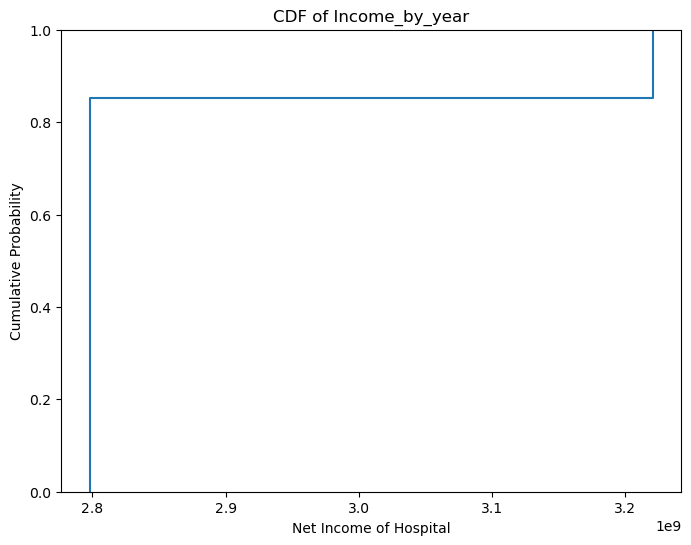

In [27]:
# CDF analysis for Income_by_year
plt.figure(figsize=(8, 6))
sns.ecdfplot(cleaned_data['Income_by_year'])
plt.title('CDF of Income_by_year')
plt.xlabel('Net Income of Hospital')
plt.ylabel('Cumulative Probability')
plt.show()

## Comparing the distribution of net incomes between hospitals in urban areas vs. hospitals in rural areas.

In [28]:
import numpy as np

# Filter data for Riverside County and Los Angeles County
riverside_data = cleaned_data[cleaned_data['COUNTY'] == 'Riverside']
la_data = cleaned_data[cleaned_data['COUNTY'] == 'Los Angeles']

## Probability Mass Function (PMF) plot compares the distribution of net incomes (Income_by_year) for hospitals in Riverside County and Los Angeles County.

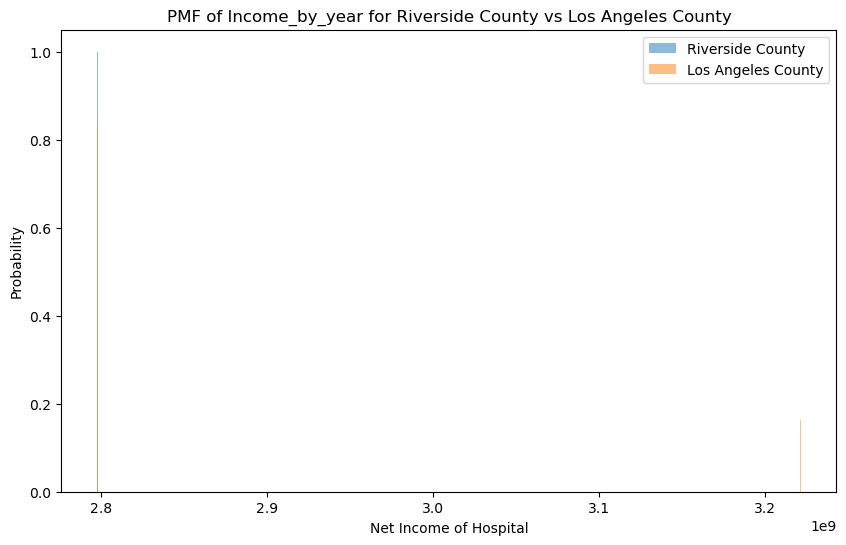

In [29]:
# Calculate PMFs
riverside_pmf = riverside_data['Income_by_year'].value_counts(normalize=True).sort_index()
la_pmf = la_data['Income_by_year'].value_counts(normalize=True).sort_index()

# Plot PMFs
plt.figure(figsize=(10, 6))
plt.bar(riverside_pmf.index, riverside_pmf.values, width=1e6, alpha=0.5, label='Riverside County')
plt.bar(la_pmf.index, la_pmf.values, width=1e6, alpha=0.5, label='Los Angeles County')
plt.title('PMF of Income_by_year for Riverside County vs Los Angeles County')
plt.xlabel('Net Income of Hospital')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Cumulative Distribution Function (CDF) analysis for the Income_by_year variable

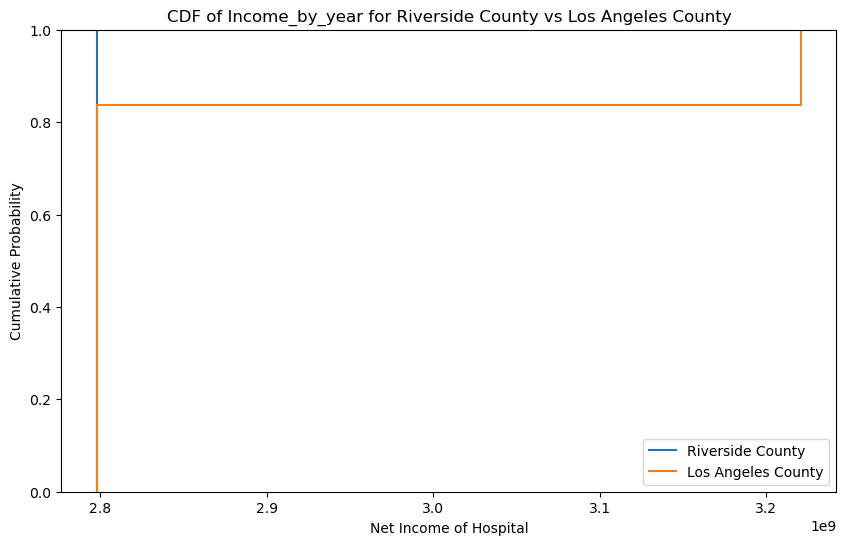

In [30]:
# CDF analysis for Income_by_year for Riverside County vs Los Angeles County
plt.figure(figsize=(10, 6))
sns.ecdfplot(riverside_data['Income_by_year'], label='Riverside County')
sns.ecdfplot(la_data['Income_by_year'], label='Los Angeles County')
plt.title('CDF of Income_by_year for Riverside County vs Los Angeles County')
plt.xlabel('Net Income of Hospital')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

## The Analytical Distribution Plot for DIS_TOT (Number of Patients Discharged) is displayed.
Fitted a normal distribution to the data and plotted both the actual data (histogram) and the fitted normal distribution (black line).


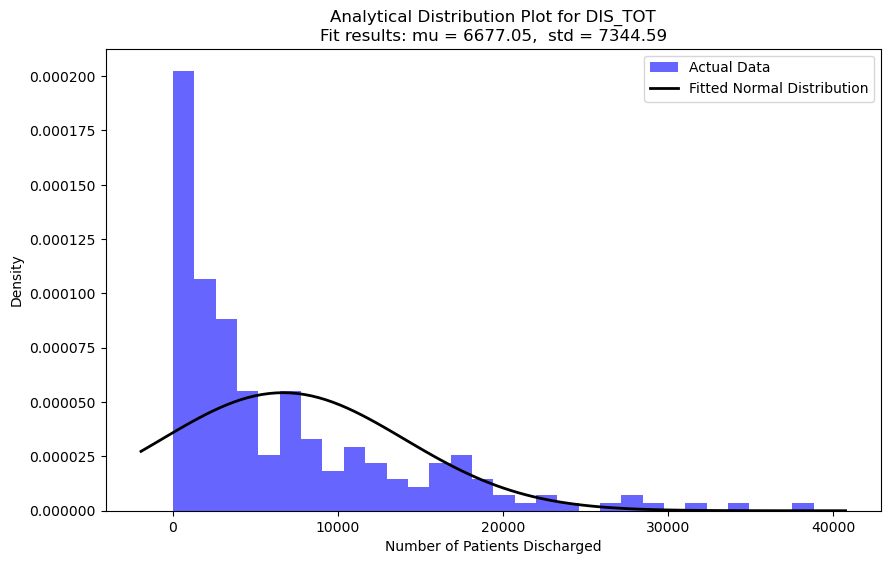

In [31]:
from scipy.stats import norm

# Fit a normal distribution to the data
mu, std = norm.fit(cleaned_data['DIS_TOT'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['DIS_TOT'], bins=30, density=True, alpha=0.6, color='b', label='Actual Data')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title('Analytical Distribution Plot for DIS_TOT\n' + title)
plt.xlabel('Number of Patients Discharged')
plt.ylabel('Density')
plt.legend()
plt.show()

In [32]:
# Identifying columns that might be related to discharges or hospital operations
relevant_columns = [col for col in cleaned_data.columns if 'DIS' in col or 'TOT' in col]
relevant_columns

['DAY_TOT',
 'DIS_MCAR_TR',
 'DIS_MCAR_MC',
 'DIS_MCAL_TR',
 'DIS_MCAL_MC',
 'DIS_CNTY',
 'DIS_THRD_TR',
 'DIS_THRD_MC',
 'DIS_OTH_IND',
 'DIS_OTH',
 'DIS_TOT',
 'DIS_ACUTE',
 'DIS_PSYCH',
 'DIS_CHEM',
 'DIS_REHAB',
 'DIS_LTC',
 'DIS_RESDNT',
 'DIS_NURSRY',
 'VIS_TOT',
 'TOT_CAP_REV',
 'TOT_OP_EXP',
 'GR_IP_TOT',
 'GR_OP_TOT',
 'DISP_855',
 'TOT_ASST',
 'TOT_PPE',
 'TOT_LTDEBT']

## 1.	Net Income vs. Number of Patients Discharged: 
This plot shows the relationship between the net income of hospitals and the number of patients they discharged. There doesn't seem to be a clear linear relationship, but there is a concentration of data points in the lower left corner, indicating many hospitals with lower net incomes and fewer discharges.

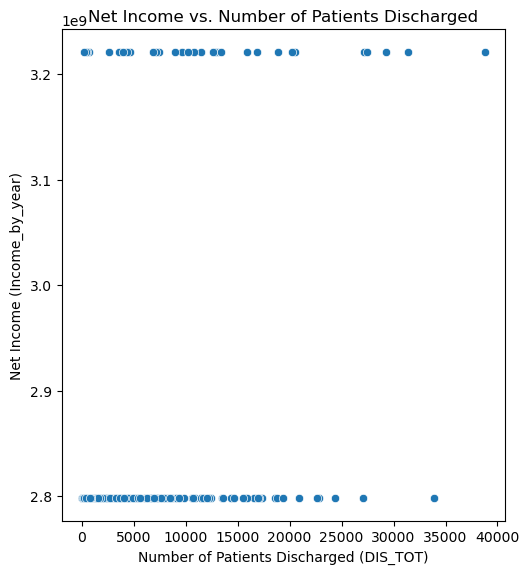

In [39]:
plt.figure(figsize=(10, 6))

# Scatter plot for Income_by_year vs DIS_TOT
plt.subplot(1, 2, 1)
sns.scatterplot(x=cleaned_data['DIS_TOT'], y=cleaned_data['Income_by_year'])
plt.title('Net Income vs. Number of Patients Discharged')
plt.xlabel('Number of Patients Discharged (DIS_TOT)')
plt.ylabel('Net Income (Income_by_year)')
plt.tight_layout()
plt.show()

## 2.	Net Income vs. Total Operating Expense: 
This plot shows the relationship between the net income of hospitals and their total operating expenses. There's a noticeable trend where hospitals with higher operating expenses also tend to have higher net incomes. This could be due to larger hospitals having both higher expenses and higher revenues, leading to higher net incomes.

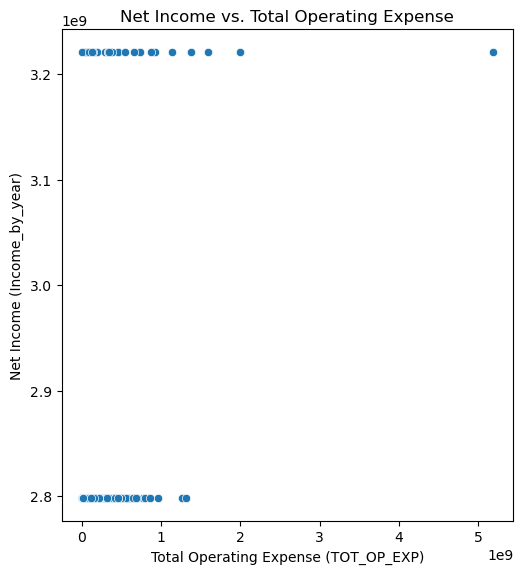

In [40]:
plt.figure(figsize=(10, 6))
# Scatter plot for Income_by_year vs TOT_OP_EXP
plt.subplot(1, 2, 2)
sns.scatterplot(x=cleaned_data['TOT_OP_EXP'], y=cleaned_data['Income_by_year'])
plt.title('Net Income vs. Total Operating Expense')
plt.xlabel('Total Operating Expense (TOT_OP_EXP)')
plt.ylabel('Net Income (Income_by_year)')
plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import ttest_ind

# Extracting income data for Riverside and Los Angeles counties
riverside_income = cleaned_data[cleaned_data['COUNTY'] == 'Riverside']['Income_by_year']
la_income = cleaned_data[cleaned_data['COUNTY'] == 'Los Angeles']['Income_by_year']

# Performing a two-sample t-test
t_stat, p_value = ttest_ind(riverside_income, la_income, equal_var=True)

t_stat, p_value

C:\Users\salin\AppData\Local\Temp\ipykernel_22724\709084938.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(riverside_income, la_income, equal_var=True)


(-1.4446302370292299, 0.1534400850117679)

## Covariance and Pearson's Correlation Analysis between Total Discharges and Total Operating Expenses


In [36]:
# Calculating Covariance between 'DIS_TOT' and 'TOT_OP_EXP'
covariance_dis_exp = cleaned_data[['DIS_TOT', 'TOT_OP_EXP']].cov().iloc[0, 1]

# Calculating Pearson’s Correlation between 'DIS_TOT' and 'TOT_OP_EXP'
correlation_dis_exp = cleaned_data[['DIS_TOT', 'TOT_OP_EXP']].corr().iloc[0, 1]

covariance_dis_exp, correlation_dis_exp

(2336053489031.109, 0.6962108355048342)

## Regression Analysis: Modeling Relationship Between 'BED_DAYS' and Selected Variables

In [37]:
import statsmodels.api as sm

In [38]:
# Selecting the independent variables without 'BED_DAYS' and adding a constant to the model (for the intercept)
X = cleaned_data[['DIS_TOT', 'TOT_OP_EXP', 'DAY_TOT']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NURS_FTE   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     776.3
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          5.81e-112
Time:                        12:09:29   Log-Likelihood:                -1295.6
No. Observations:                 210   AIC:                             2599.
Df Residuals:                     206   BIC:                             2613.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8669     11.891     -0.409      0.683     -28.310      18.576
DIS_TOT        0.0237      0.003      7.708      0.000       0.018       0.030
TOT_OP_EXP  3.577e-07   2.54e-08     14.104      0.000    3.08e-07    4.08e-07
DAY_TOT        0.0022      0.001      3.718      0.000       0.001       0.003
==============================================================================
Omnibus:                      245.400   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14001.165
Skew:                           4.642   Prob(JB):                         0.00
Kurtosis:                      41.909   Cond. No.                     7.71e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""